In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics

In [2]:
fileName = "./scripts/sssp_trails_1_results.csv"
new_data = pd.read_csv(fileName)
new_data
CNT_POW = 0.95

In [3]:
fileN = "./RunTimePerf/v0/SSSP"

In [4]:
new_data = pd.read_csv(fileN)
new_data

,Unnamed: 0,BenchmarkName,IterationID,Loop Count,Real Time,System Time,User Time
0,0,SSSP,D0,20,55081.0,29384.0,7212.0
1,0,SSSP,D1,10,26543.0,14580.0,3420.0
2,0,SSSP,D2,5,13868.0,7612.0,1824.0
3,0,SSSP,D3,5,13495.0,7372.0,1716.0
4,0,SSSP,C0,20,53445.0,28156.0,7124.0
5,0,SSSP,C1,10,26872.0,13880.0,3720.0
6,0,SSSP,C2,5,13378.0,6984.0,1864.0
7,0,SSSP,C3,5,13285.0,6752.0,1900.0


In [5]:
for index,row in new_data.iterrows():
    print(row["BenchmarkName"],row["IterationID"],row["Loop Count"], row["Real Time"])

SSSP D0 20 55081.0
SSSP D1 10 26543.0
SSSP D2 5 13868.0
SSSP D3 5 13495.0
SSSP C0 20 53445.0
SSSP C1 10 26872.0
SSSP C2 5 13378.0
SSSP C3 5 13285.0


In [6]:
def getPerformance(fileName):
    new_data = pd.read_csv(fileName)
    base_perf = max(new_data["Real Time"])
    perf_data = {}
    for index,row in new_data.iterrows():
        if row["BenchmarkName"] not in perf_data:
            perf_data[row["BenchmarkName"]] = {}
        perf_data[row["BenchmarkName"]][(row["IterationID"],row["Loop Count"])] = row["Real Time"]

    return perf_data
    

getPerformance("./RunTimePerf/v0/SSSP")

{'SSSP': {('D0', 20): 55081.0,
  ('D1', 10): 26543.0,
  ('D2', 5): 13868.0,
  ('D3', 5): 13495.0,
  ('C0', 20): 53445.0,
  ('C1', 10): 26872.0,
  ('C2', 5): 13378.0,
  ('C3', 5): 13285.0}}

In [7]:
def getPerformanceF(folderName):
    dirpath = os.path.join(os.getcwd() + "/"+folderName)
    perf_dataT = {}
    for filename in os.listdir(dirpath):
        f = os.path.join(dirpath, filename)
#         print(f)
        new_data = pd.read_csv(f)
        for index,row in new_data.iterrows():
            if row["BenchmarkName"] not in perf_dataT:
                perf_dataT[row["BenchmarkName"]] = {}
            perf_dataT[row["BenchmarkName"]][(row["IterationID"],row["Loop Count"])] = row["Real Time"]/1000.0

    return perf_dataT

In [8]:
getPerformanceF("RunTimePerf/v1")

{'SC': {('D0', 20): 191.782,
  ('D1', 10): 100.236,
  ('D2', 5): 49.685,
  ('D3', 5): 48.633,
  ('C0', 20): 193.054,
  ('C1', 10): 95.924,
  ('C2', 5): 48.119,
  ('C3', 5): 48.777,
  ('P0', 20): 193.113,
  ('P1', 10): 95.524,
  ('P2', 5): 49.095,
  ('P3', 5): 48.543,
  ('COP0', 20): 197.623,
  ('COP1', 10): 92.839,
  ('COP2', 5): 48.451,
  ('COP3', 5): 43.931},
 'HSTI': {('D0', 100): 105.837,
  ('D1', 50): 54.29,
  ('D2', 20): 21.768,
  ('D3', 10): 10.296,
  ('C0', 100): 86.667,
  ('C1', 50): 43.704,
  ('C2', 20): 17.5,
  ('C3', 10): 8.76,
  ('P0', 100): 88.03399999999999,
  ('P1', 50): 43.961,
  ('P2', 20): 17.671,
  ('P3', 10): 8.816,
  ('COP0', 100): 104.342,
  ('COP1', 50): 53.133,
  ('COP2', 20): 21.373,
  ('COP3', 10): 10.506},
 'TRNS': {('D0', 20): 107.433,
  ('D1', 10): 53.266,
  ('D2', 5): 26.614,
  ('D3', 5): 26.621,
  ('C0', 20): 105.832,
  ('C1', 10): 52.611,
  ('C2', 5): 26.493,
  ('C3', 5): 26.327,
  ('P0', 20): 109.901,
  ('P1', 10): 77.184,
  ('P2', 5): 27.576,
  ('P3',

In [9]:
def getPowerF(foldername):
    dirpath = os.path.join(os.getcwd() + "/"+foldername)
    powData = {}
    for fname in os.listdir(dirpath):
        ft = fname.split("_")
#         print(ft[1],ft[3],ft[5])
        if ft[1] not in powData:
            powData[ft[1]] = {}

        f = os.path.join(dirpath, fname)
        file = open(f, 'r')
        lines = file.readlines()
        mydata = []
        for line in lines:
            line = line.replace(" ",",")
            line = line.split(",")
            value = int(line[line.index('VDD_IN')+1].split("/")[0])
            mydata.append(value)

        powData[ft[1]][(ft[3],int(ft[5]))] = sum(mydata)/10000.0
    return powData
    

In [10]:
getPowerF("TegraCombined/v0")

{'STCLUST': {('C1', 10): 748.3801,
  ('D1', 10): 834.9231,
  ('C0', 15): 1115.603,
  ('C2', 5): 378.2379,
  ('C3', 2): 150.2211,
  ('D0', 15): 1246.0988,
  ('D3', 2): 165.0056,
  ('D2', 5): 418.3721},
 'CEDD': {('D2', 2): 78.8149,
  ('D3', 2): 78.9247,
  ('D1', 5): 195.3492,
  ('C3', 2): 88.0008,
  ('C2', 2): 86.8125,
  ('C1', 5): 225.1509,
  ('D0', 10): 394.633,
  ('C0', 10): 438.4012},
 'BFS': {('C0', 20): 19.5887,
  ('C1', 10): 9.4765,
  ('D1', 10): 9.561,
  ('D0', 20): 22.1548,
  ('C2', 5): 4.7383,
  ('C3', 5): 4.7618,
  ('D3', 5): 4.9354,
  ('D2', 5): 4.6879},
 'SSSP': {('C0', 20): 177.1832,
  ('C1', 10): 87.9575,
  ('D1', 10): 108.273,
  ('D0', 20): 230.467,
  ('D3', 5): 54.0077,
  ('D2', 5): 55.8339,
  ('C2', 5): 43.8713,
  ('C3', 5): 43.6398},
 'TRNS': {('D0', 20): 432.2053,
  ('D1', 10): 216.3741,
  ('C1', 10): 208.3334,
  ('C0', 20): 419.8664,
  ('D3', 5): 108.6183,
  ('D2', 5): 108.4514,
  ('C2', 5): 103.9439,
  ('C3', 5): 104.3266},
 'SC': {('D1', 10): 185.622,
  ('D0', 20)

In [57]:
#Get PPE

# We will get the D as 1 and the assign the others
pow_dict = getPowerF("TegraCombined/v0")
perf_dict = getPerformanceF("RunTimePerf/v0")
PPE_dict = {}
for key in pow_dict:
    PPE_dict[key] = {}
    print(key)
    for dkey in pow_dict[key]:
        if dkey[0][0]=='D':
#             print(dkey)
            fkey = 'C'+dkey[0][1]
            skey = dkey[1]
            nk = (fkey,skey)
            perfD = perf_dict[key][dkey]
            perfC = perf_dict[key][nk]
            powrD = pow_dict[key][dkey]
            powrC = pow_dict[key][nk]
            
            pp_val = (perfD*powrD)/(perfC*powrC)
            ppr_val = pp_val
            if pp_val > 1.0:
                ppr_val = pp_val/CNT_POW
            else:
                ppr_val = 1.0/pp_val
                ppr_val = 1.0 + (ppr_val-1.0)*0.9
                ppr_val = ppr_val if (ppr_val < 1.5) else 1.2 + (ppr_val-1.2)*0.2
            PPE_dict[key][nk] = ppr_val
        else:
            continue


STCLUST
CEDD
BFS
SSSP
TRNS
SC
PFIND
TQ
HSTI
GAUSS
HSTO


In [58]:
PPE_dict

{'STCLUST': {('C1', 10): 1.1666425261391984,
  ('C0', 15): 1.1610409183740336,
  ('C3', 2): 1.1617854796289033,
  ('C2', 5): 1.163752146618461},
 'CEDD': {('C2', 2): 1.0814091229378846,
  ('C3', 2): 1.093002680370066,
  ('C1', 5): 1.1285996328313304,
  ('C0', 10): 1.0917129508850616},
 'BFS': {('C1', 10): 1.0392011903177543,
  ('C0', 20): 1.1529170538569653,
  ('C3', 5): 1.0397360449306292,
  ('C2', 5): 1.0630092229292887},
 'SSSP': {('C1', 10): 1.3012246710194222,
  ('C0', 20): 1.382648955999686,
  ('C3', 5): 1.3233071403309444,
  ('C2', 5): 1.355396358422905},
 'TRNS': {('C0', 20): 1.0846415152425424,
  ('C1', 10): 1.0935461676419922,
  ('C3', 5): 1.0972203677933277,
  ('C2', 5): 1.0966993590418133},
 'SC': {('C1', 10): 1.1283574175390676,
  ('C0', 20): 1.1069211539304367,
  ('C3', 5): 1.1303063721533948,
  ('C2', 5): 1.1897815995068277},
 'PFIND': {('C0', 10): 1.0441426737538757,
  ('C2', 3): 1.0262521115984955,
  ('C1', 5): 1.0411180777202143,
  ('C3', 2): 1.0711552446434618},
 'TQ

In [59]:
pow_dictN = getPowerF("TegraCombined/v1")
perf_dictN = getPerformanceF("RunTimePerf/v1")

In [11]:
pow_dictN0 = getPowerF("TegraCombined/v0")
perf_dictN0 = getPerformanceF("RunTimePerf/v0")

In [61]:
perf_dictN

{'SC': {('D0', 20): 191.782,
  ('D1', 10): 100.236,
  ('D2', 5): 49.685,
  ('D3', 5): 48.633,
  ('C0', 20): 193.054,
  ('C1', 10): 95.924,
  ('C2', 5): 48.119,
  ('C3', 5): 48.777,
  ('P0', 20): 193.113,
  ('P1', 10): 95.524,
  ('P2', 5): 49.095,
  ('P3', 5): 48.543,
  ('COP0', 20): 197.623,
  ('COP1', 10): 92.839,
  ('COP2', 5): 48.451,
  ('COP3', 5): 43.931},
 'HSTI': {('D0', 100): 105.837,
  ('D1', 50): 54.29,
  ('D2', 20): 21.768,
  ('D3', 10): 10.296,
  ('C0', 100): 86.667,
  ('C1', 50): 43.704,
  ('C2', 20): 17.5,
  ('C3', 10): 8.76,
  ('P0', 100): 88.03399999999999,
  ('P1', 50): 43.961,
  ('P2', 20): 17.671,
  ('P3', 10): 8.816,
  ('COP0', 100): 104.342,
  ('COP1', 50): 53.133,
  ('COP2', 20): 21.373,
  ('COP3', 10): 10.506},
 'TRNS': {('D0', 20): 107.433,
  ('D1', 10): 53.266,
  ('D2', 5): 26.614,
  ('D3', 5): 26.621,
  ('C0', 20): 105.832,
  ('C1', 10): 52.611,
  ('C2', 5): 26.493,
  ('C3', 5): 26.327,
  ('P0', 20): 109.901,
  ('P1', 10): 77.184,
  ('P2', 5): 27.576,
  ('P3',

In [62]:
pow_dictN

{'SC': {('P3', 5): 3.544488738738739,
  ('D1', 10): 2.061442731277533,
  ('P2', 5): 3.569356347438753,
  ('D0', 20): 2.1157314548591146,
  ('D3', 5): 2.0523409090909093,
  ('COP3', 5): 2.62522193877551,
  ('COP2', 5): 2.429472350230415,
  ('D2', 5): 2.081877505567929,
  ('COP0', 20): 2.4407108229988728,
  ('C2', 5): 4.017477272727272,
  ('C0', 20): 3.5352593431483577,
  ('C3', 5): 4.0170695067264575,
  ('COP1', 10): 2.4318990384615384,
  ('C1', 10): 3.718144811858609,
  ('P0', 20): 3.568426953567384,
  ('P1', 10): 3.5536219931271478},
 'CEDD': {('D2', 2): 2.5426,
  ('D3', 2): 2.5793924731182796,
  ('P0', 10): 3.6567944474105714,
  ('D1', 5): 2.420885683760684,
  ('P1', 5): 4.0625278372591005,
  ('P2', 2): 4.058214673913043,
  ('P3', 2): 4.060566037735849,
  ('COP0', 10): 2.0201636460554373,
  ('COP1', 5): 2.0097613390928726,
  ('COP2', 2): 1.994881081081081,
  ('COP3', 2): 1.997,
  ('C3', 2): 3.559741935483871,
  ('C2', 2): 3.575866310160428,
  ('C1', 5): 3.589603875134553,
  ('D0', 10

In [12]:
perf_dictN0

{'SC': {('D0', 20): 197.644,
  ('D1', 10): 97.784,
  ('D2', 5): 45.852,
  ('D3', 5): 48.61,
  ('C0', 20): 202.196,
  ('C1', 10): 101.401,
  ('C2', 5): 50.12,
  ('C3', 5): 50.021},
 'HSTI': {('D0', 100): 100.547,
  ('D1', 50): 50.418,
  ('D2', 20): 21.637,
  ('D3', 10): 9.846,
  ('C0', 100): 87.996,
  ('C1', 50): 44.106,
  ('C2', 20): 17.605,
  ('C3', 10): 8.848},
 'PFIND': {('D0', 10): 384.109,
  ('D1', 5): 189.192,
  ('D2', 3): 115.668,
  ('D3', 2): 74.405,
  ('C0', 10): 368.167,
  ('C1', 5): 181.387,
  ('C2', 3): 108.876,
  ('C3', 2): 74.571},
 'TRNS': {('D0', 20): 107.404,
  ('D1', 10): 53.529,
  ('D2', 5): 26.679,
  ('D3', 5): 26.561,
  ('C0', 20): 124.643,
  ('C1', 10): 62.193,
  ('C2', 5): 31.059,
  ('C3', 5): 30.97},
 'HSTO': {('D0', 20): 130.591,
  ('D1', 10): 66.035,
  ('D2', 5): 32.917,
  ('D3', 5): 33.086,
  ('C0', 20): 127.619,
  ('C1', 10): 63.704,
  ('C2', 5): 31.899,
  ('C3', 5): 31.929},
 'CEDD': {('D0', 10): 206.024,
  ('D1', 5): 103.676,
  ('D2', 2): 41.941,
  ('D3', 

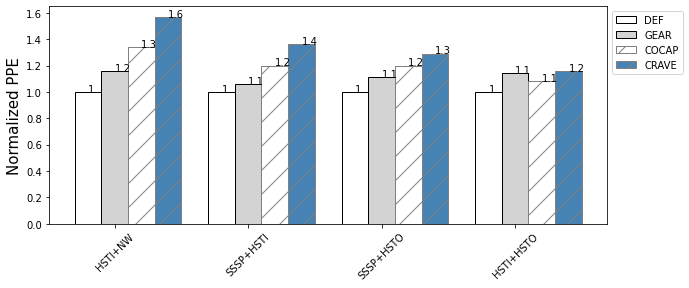

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],round(y[i],1))
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(10, 4)) 
# set height of bar 
DEF = [1, 1, 1, 1] 
GEAR = [1.16, 1.06, 1.11, 1.14] 
COCAP = [1.34, 1.2, 1.2, 1.08]
CRAVE = [1.57,1.36,1.29,1.16]
# IT = [0.51963746]
# ECE = [0.32326284]
# CSE = [0.1570997]
# Set position of bar on X axis 
br1 = np.arange(len(DEF)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
 
# Make the plot
plt.bar(br1, DEF, color ='white', width = barWidth, 
        edgecolor ='black', label ='DEF')
addlabels(br1, DEF)

plt.bar(br2, GEAR, color ='lightgrey', width = barWidth, 
        edgecolor ='black', label ='GEAR')

addlabels(br2, GEAR)
plt.bar(br3, COCAP, color ='white', width = barWidth, 
        edgecolor ='grey', label ='COCAP',hatch= "/") 
addlabels(br3, COCAP)
plt.bar(br4, CRAVE, color ='steelblue', width = barWidth, 
        edgecolor ='grey', label ='CRAVE',hatch= "/") 
addlabels(br4, CRAVE)


    
    
    
# Adding Xticks 
# plt.xlabel('Workload', fontweight ='bold', fontsize = 15) 
plt.ylabel('Normalized PPE', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(DEF))], 
        ['HSTI+NW', 'SSSP+HSTI', 'SSSP+HSTO', 'HSTI+HSTO'])
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("CONCURRENT.svg")

<ipython-input-64-424f8457ff22>:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0])


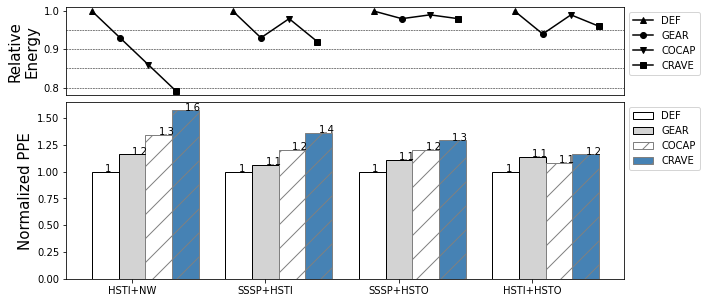

In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import gridspec

from matplotlib.lines import Line2D


def addlabels(x,y,plt):
    for i in range(len(x)):
        plt.text(x[i],y[i],round(y[i],1))
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(10, 5))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])
# set height of bar 
DEF = [1, 1, 1, 1]
E_DEF = [1,1,1,1]
GEAR = [1.16, 1.06, 1.11, 1.14]
E_GEAR = [0.93,0.93,0.98,0.94]
COCAP = [1.34, 1.2, 1.2, 1.08]
E_COCAP = [0.86,0.98,0.99,0.99]
CRAVE = [1.57,1.36,1.29,1.16]
E_CRAVE = [0.79,0.92,0.98,0.96]
# IT = [0.51963746]
# ECE = [0.32326284]
# CSE = [0.1570997]
# Set position of bar on X axis 
br1 = np.arange(len(DEF)) 
br2 = [round(x + barWidth,1) for x in br1] 
br3 = [round(x + barWidth,1) for x in br2] 
br4 = [round(x + barWidth,1) for x in br3] 

x_group = []
y_group = []
for i in range(4):
    x_group.append([br1[i],br2[i],br3[i],br4[i]])
    y_group.append([E_DEF[i],E_GEAR[i],E_COCAP[i],E_CRAVE[i]])

ax0 = plt.subplot(gs[0])
markers = ['^','o','v','s']
h_labels = ['DEF','GEAR','COCAP','CRAVE']
for i in range(4):
    ax0.plot(x_group[i],y_group[i],color='k')
    for j in range(4):
        ax0.plot(x_group[i][j], y_group[i][j], marker=markers[j], label=h_labels[j],color='k')


# Custom labels
custom_lines = [
    Line2D([0], [0], marker='^', color='k', label='DEF'),
    Line2D([0], [0], marker='o', color='k', label='GEAR'),
    Line2D([0], [0], marker='v', color='k', label='COCAP'),
    Line2D([0], [0], marker='s', color='k', label='CRAVE'),
]

# Add the custom legend to the plot
ax0.legend(handles=custom_lines, bbox_to_anchor=(1.0, 1.0))

        
        
ax1 = plt.subplot(gs[1])
# Make the plot
ax1.bar(br1, DEF, color ='white', width = barWidth, 
        edgecolor ='black', label ='DEF')
addlabels(br1, DEF,ax1)

ax1.bar(br2, GEAR, color ='lightgrey', width = barWidth, 
        edgecolor ='black', label ='GEAR')

addlabels(br2, GEAR,ax1)
ax1.bar(br3, COCAP, color ='white', width = barWidth, 
        edgecolor ='grey', label ='COCAP',hatch= "/") 
addlabels(br3, COCAP,ax1)
ax1.bar(br4, CRAVE, color ='steelblue', width = barWidth, 
        edgecolor ='grey', label ='CRAVE',hatch= "/") 
addlabels(br4, CRAVE,ax1)


    
    
    
# Adding Xticks 
# plt.xlabel('Workload', fontweight ='bold', fontsize = 15) 
ax1.set_ylabel('Normalized PPE', fontsize = 15) 
ax1.set_xticks([r + barWidth for r in range(len(DEF))]) 
ax1.set_xticklabels(['HSTI+NW', 'SSSP+HSTI', 'SSSP+HSTO', 'HSTI+HSTO'],rotation=0)


ax0.set_ylabel('Relative\nEnergy', fontsize = 15)
ax0.set_xticks([])
# ax0.set_xticks([r + barWidth for r in range(len(DEF))]) 
# ax0.set_xticklabels(['HSTI+NW', 'SSSP+HSTI', 'SSSP+HSTO', 'HSTI+HSTO'],rotation=0)

ax0.axhline(0.95, linestyle='--',color='k',linewidth=0.5)
ax0.axhline(0.9, linestyle='--',color='k',linewidth=0.5)
ax0.axhline(0.85, linestyle='--',color='k',linewidth=0.5)
ax0.axhline(0.8, linestyle='--',color='k',linewidth=0.5)

ax1.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplots_adjust(hspace=0.05)
plt.savefig("CONCURRENT.svg")

In [66]:
br4

[0.6, 1.6, 2.6, 3.6]

<ipython-input-89-487014d8e8ee>:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0])


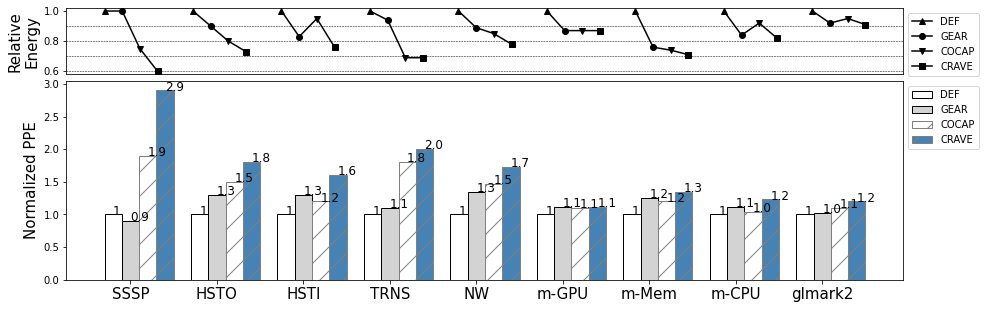

In [89]:
import numpy as np 
import matplotlib.pyplot as plt 

def addlabels(x,y,plt):
    for i in range(len(x)):
        plt.text(x[i],y[i],round(y[i],1),fontsize=12)
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(15, 5)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])
# set height of bar 
DEF = [1, 1, 1, 1,1,1, 1, 1, 1] 
GEAR = [0.9, 1.3, 1.3, 1.1,1.34,1.12, 1.25, 1.11, 1.03] 
COCAP = [1.9, 1.5, 1.2, 1.8,1.47,1.10, 1.2, 1.04, 1.1]
CRAVE = [2.9,1.8,1.6,2.0,1.73,1.12,1.34,1.23,1.2]

E_DEF = [1, 1, 1, 1,1,1, 1, 1, 1] 
E_GEAR =  [1, 0.9, 0.83, 0.94,0.89,0.87, 0.76, 0.84, 0.92] 
E_COCAP = [0.75, 0.8, 0.95, 0.69,0.85,0.87, 0.74, 0.92, 0.95]
E_CRAVE = [0.60,0.73,0.76,0.69,0.78,0.87,0.71,0.82,0.91]
# IT = [0.51963746]
# ECE = [0.32326284]
# CSE = [0.1570997]
# Set position of bar on X axis 
br1 = np.arange(len(DEF)) 
br2 = [round(x + barWidth,1) for x in br1] 
br3 = [round(x + barWidth,1) for x in br2] 
br4 = [round(x + barWidth,1) for x in br3] 


x_group = []
y_group = []
for i in range(len(E_DEF)):
    x_group.append([br1[i],br2[i],br3[i],br4[i]])
    y_group.append([E_DEF[i],E_GEAR[i],E_COCAP[i],E_CRAVE[i]])

ax0 = plt.subplot(gs[0])
markers = ['^','o','v','s']
h_labels = ['DEF','GEAR','COCAP','CRAVE']
for i in range(len(E_DEF)):
    ax0.plot(x_group[i],y_group[i],color='k')
    for j in range(4):
        ax0.plot(x_group[i][j], y_group[i][j], marker=markers[j], label=h_labels[j],color='k')


# Custom labels
custom_lines = [
    Line2D([0], [0], marker='^', color='k', label='DEF'),
    Line2D([0], [0], marker='o', color='k', label='GEAR'),
    Line2D([0], [0], marker='v', color='k', label='COCAP'),
    Line2D([0], [0], marker='s', color='k', label='CRAVE'),
]

# Add the custom legend to the plot
ax0.legend(handles=custom_lines, bbox_to_anchor=(1.0, 1.0))


ax1 = plt.subplot(gs[1])
ax1.bar(br1, DEF, color ='white', width = barWidth, 
        edgecolor ='black', label ='DEF')
addlabels(br1, DEF,ax1)

ax1.bar(br2, GEAR, color ='lightgrey', width = barWidth, 
        edgecolor ='black', label ='GEAR')

addlabels(br2, GEAR,ax1)
ax1.bar(br3, COCAP, color ='white', width = barWidth, 
        edgecolor ='grey', label ='COCAP',hatch= "/") 
addlabels(br3, COCAP,ax1)
ax1.bar(br4, CRAVE, color ='steelblue', width = barWidth, 
        edgecolor ='grey', label ='CRAVE',hatch= "/") 
addlabels(br4, CRAVE,ax1)


    
    
    
# Adding Xticks 
# plt.xlabel('Workload', fontweight ='bold', fontsize = 15) 

ax1.set_ylabel('Normalized PPE', fontsize = 15) 
ax1.set_xticks([r + barWidth for r in range(len(DEF))]) 
ax1.set_xticklabels(['SSSP', 'HSTO', 'HSTI', 'TRNS','NW','m-GPU', 'm-Mem', 'm-CPU', 'glmark2'],rotation=0,fontsize=15)


ax0.set_ylabel('Relative\nEnergy', fontsize = 15)
ax0.set_xticks([])

ax0.axhline(0.9, linestyle='--',color='k',linewidth=0.5)
ax0.axhline(0.8, linestyle='--',color='k',linewidth=0.5)
ax0.axhline(0.7, linestyle='--',color='k',linewidth=0.5)
ax0.axhline(0.6, linestyle='--',color='k',linewidth=0.5)


ax1.legend(bbox_to_anchor=(1.0, 1.0),loc="upper left")
plt.subplots_adjust(hspace=0.05)
plt.savefig("HETRES_Comb.svg")

<ipython-input-90-d01a2be694d7>:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0])


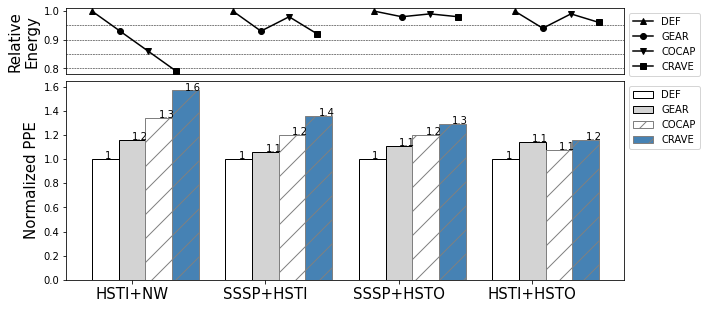

In [90]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import gridspec

from matplotlib.lines import Line2D


def addlabels(x,y,plt):
    for i in range(len(x)):
        plt.text(x[i],y[i],round(y[i],1))
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(10, 5))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])
# set height of bar 
DEF = [1, 1, 1, 1]
E_DEF = [1,1,1,1]
GEAR = [1.16, 1.06, 1.11, 1.14]
E_GEAR = [0.93,0.93,0.98,0.94]
COCAP = [1.34, 1.2, 1.2, 1.08]
E_COCAP = [0.86,0.98,0.99,0.99]
CRAVE = [1.57,1.36,1.29,1.16]
E_CRAVE = [0.79,0.92,0.98,0.96]
# IT = [0.51963746]
# ECE = [0.32326284]
# CSE = [0.1570997]
# Set position of bar on X axis 
br1 = np.arange(len(DEF)) 
br2 = [round(x + barWidth,1) for x in br1] 
br3 = [round(x + barWidth,1) for x in br2] 
br4 = [round(x + barWidth,1) for x in br3] 

x_group = []
y_group = []
for i in range(4):
    x_group.append([br1[i],br2[i],br3[i],br4[i]])
    y_group.append([E_DEF[i],E_GEAR[i],E_COCAP[i],E_CRAVE[i]])

ax0 = plt.subplot(gs[0])
markers = ['^','o','v','s']
h_labels = ['DEF','GEAR','COCAP','CRAVE']
for i in range(4):
    ax0.plot(x_group[i],y_group[i],color='k')
    for j in range(4):
        ax0.plot(x_group[i][j], y_group[i][j], marker=markers[j], label=h_labels[j],color='k')


# Custom labels
custom_lines = [
    Line2D([0], [0], marker='^', color='k', label='DEF'),
    Line2D([0], [0], marker='o', color='k', label='GEAR'),
    Line2D([0], [0], marker='v', color='k', label='COCAP'),
    Line2D([0], [0], marker='s', color='k', label='CRAVE'),
]

# Add the custom legend to the plot
ax0.legend(handles=custom_lines, bbox_to_anchor=(1.0, 1.0))

        
        
ax1 = plt.subplot(gs[1])
# Make the plot
ax1.bar(br1, DEF, color ='white', width = barWidth, 
        edgecolor ='black', label ='DEF')
addlabels(br1, DEF,ax1)

ax1.bar(br2, GEAR, color ='lightgrey', width = barWidth, 
        edgecolor ='black', label ='GEAR')

addlabels(br2, GEAR,ax1)
ax1.bar(br3, COCAP, color ='white', width = barWidth, 
        edgecolor ='grey', label ='COCAP',hatch= "/") 
addlabels(br3, COCAP,ax1)
ax1.bar(br4, CRAVE, color ='steelblue', width = barWidth, 
        edgecolor ='grey', label ='CRAVE',hatch= "/") 
addlabels(br4, CRAVE,ax1)


    
    
    
# Adding Xticks 
# plt.xlabel('Workload', fontweight ='bold', fontsize = 15) 
ax1.set_ylabel('Normalized PPE', fontsize = 15) 
ax1.set_xticks([r + barWidth for r in range(len(DEF))]) 
ax1.set_xticklabels(['HSTI+NW', 'SSSP+HSTI', 'SSSP+HSTO', 'HSTI+HSTO'],rotation=0,fontsize=15)


ax0.set_ylabel('Relative\nEnergy', fontsize = 15)
ax0.set_xticks([])
# ax0.set_xticks([r + barWidth for r in range(len(DEF))]) 
# ax0.set_xticklabels(['HSTI+NW', 'SSSP+HSTI', 'SSSP+HSTO', 'HSTI+HSTO'],rotation=0)

ax0.axhline(0.95, linestyle='--',color='k',linewidth=0.5)
ax0.axhline(0.9, linestyle='--',color='k',linewidth=0.5)
ax0.axhline(0.85, linestyle='--',color='k',linewidth=0.5)
ax0.axhline(0.8, linestyle='--',color='k',linewidth=0.5)

ax1.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplots_adjust(hspace=0.05)
plt.savefig("CONCURRENT.svg")